In [1]:

import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Any

In [4]:
L = 2.5
left, right = -L, L
left_value, right_value = 1.0, 0.0


def Heaviside(x):
    H = np.empty(len(x), dtype=float)
    for i in range(len(x)):
        H[i] = 1.0 if x[i] >= 0 else 0.0
    return H


def boundary_conditions(u, n):
    u[n, 0] = left_value
    u[n, -1] = right_value


In [5]:
def solve(
        eps: float,
        a: float,
        H: Callable[[Any], Any],
        left: float,
        right: float,
        T: float,
        h: float,
        tau: float,
        apply_boundary_conditions: Callable[[Any, int], Any]
):
    x = np.arange(left, right + h, h)
    t = np.arange(0, T + tau, tau)
    u = np.zeros((len(t), len(x)))
    apply_boundary_conditions(u, 0)
    u[0, :] = np.ones(u.shape[1]) - H(x)

    for n in range(0, len(t) - 1):
        for i in range(1, len(x) - 1):
            if eps < 0.001:      
                u[n + 1, i] = u[n, i] +\
                        tau * eps * ((u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / h ** 2) -\
                        tau * a * ((u[n, i] - u[n, i-1]) / (h))
            else:
                u[n + 1, i] = u[n, i] +\
                    tau * eps * ((u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / h ** 2) -\
                    tau * a * ((u[n, i + 1] - u[n, i - 1]) / (2 * h))
            apply_boundary_conditions(u, n + 1)
    return u, x

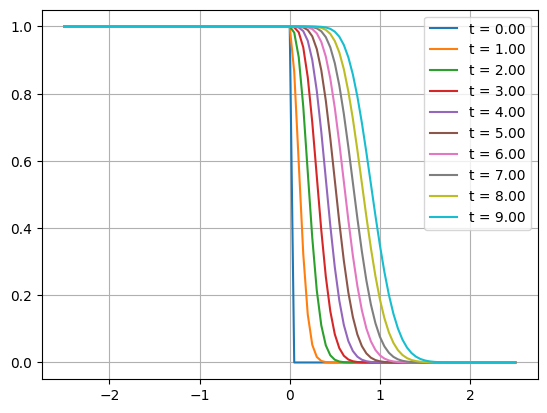

In [10]:
eps = 0.0
a = 0.1
T = 10
h = 0.05
tau = h**2 * a / 2 - 0.00001

# eps = 0
# a = 0.1
# T = 5
# h = 0.05
# tau = h**2 * a / 2 - 0.00001

u, x = solve(
    eps=eps,
    a=a,
    H=Heaviside,
    left=left,
    right=right,
    T=T,
    h=h,
    tau=tau,
    apply_boundary_conditions=boundary_conditions
)

step_count = 10
times_to_plot = np.arange(0, T, T / step_count)
for t in times_to_plot[:]:
    n = int(t / tau)
    plt.plot(x, u[n, :], label=f't = {t:.2f}')
plt.legend()
plt.grid(True)
plt.show()